<h1>Constant Power Load</h1>

<p>This notebook will discuss static and dynamic characteristics of a system including a constant power load</p>
<p>Let us consider the following circuit</p>

<img src="cplcircuit.png" alt="drawing" width="600"  height="300"/>

<p>Input data</p>

In [1]:
SetSimulationEnvironment;

% Load value
Po = 500

% Inductance
L = 0.001

% Capacitor
C = 0.001

% Line resistance
R = 1

% Nominal voltage
Vs = 100

Po =  500
L =  0.0010000
C =  0.0010000
R =  1
Vs =  100


<p>First point is to calculate the steady state solution and assess the feasibility of the operating point</p>
<p>The operating points depends on the power requested from the load</p>
<p>Changing the power level changes also the dynamic characteristics</p>

In [2]:
Vcss = Vs/2 + sqrt((Vs/2)^2-R*Po)
Iss = (Vs-Vcss)/R

Vcss =  94.721
Iss =  5.2786


<p>If the value is real, the solution is feasible and the system reaches a DC steady state</p>

<p>We now move to the small signal analysis. First point is the assessment of the eigenvalues</p>
<p>We start introducing the state matrices for small signal</p>

In [3]:
A = [-R/L -1/L; 1/C -Po/(Vcss^2)]
B = [1/L; 0]
Cs = [0 1]

A =

  -1000.000000  -1000.000000
   1000.000000     -0.055728

B =

   1000
      0

Cs =

   0   1



<p>Stability of the small signal system depends on the eigenvalues of matrix A</p>

In [4]:
eigs(A)

ans =

  -500.03 + 866.04i
  -500.03 - 866.04i



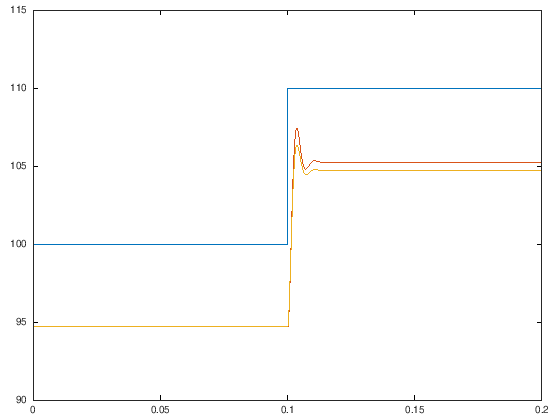

In [5]:
% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 0.2;
% Time Step
dt = 0.0001;
% Number of data flows in the schematic
nflows = 5;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

delta = 0.1;

% List of components
c1{1} = StepSource(1,Vs,(1+delta)*Vs,0.1);
c1{2} = S_Function(1,2,"cpl",[Iss,Vcss],[R,L,C,Po]);
c1{3} = StepSource(3,0,(delta)*Vs,0.1);
c1{4} = StateSpace(3,4,A,B,Cs,0,[0;0]);
c1{5} = Constant(5,Vcss);
c1{6} = Sum(4,5,6,1,1);

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1 2,6]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:),out1(1,:),out1(4,:));

<p>Playing vith the value of delta we can appreciate the difference between small and large signal analysis</p>

<p>Interesting it is also to appreciate the role of the saturation of the load.</p>
<p>Let us introduce a maximum value for the current</p>

In [18]:
Imax = 4;

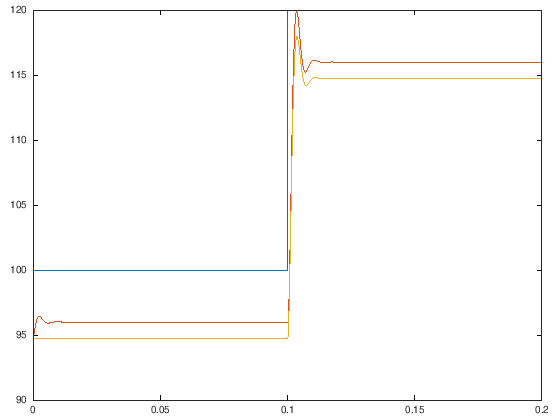

In [19]:
% Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows);

delta = 0.2;

% List of components
c2{1} = StepSource(1,Vs,(1+delta)*Vs,0.1);
c2{2} = S_Function(1,2,"cpl2",[Iss,Vcss],[R,L,C,Po,Imax]);
c2{3} = StepSource(3,0,(delta)*Vs,0.1);
c2{4} = StateSpace(3,4,A,B,Cs,0,[0;0]);
c2{5} = Constant(5,Vcss);
c2{6} = Sum(4,5,6,1,1);

sc2.AddListComponents(c2);

% Run the schematic and plot
out2 = sc2.Run([1 2,6]);
plot(out2(1,:),out2(2,:),out2(1,:),out2(3,:),out2(1,:),out2(4,:));